**Movie Sentimental Analysis**

**Source**:-https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
    http://ai.stanford.edu/~amaas/data/sentiment/

**Objective**:-
Given a review, determine whether the review is positive or negative

**Attributes**:-

1.Review-Text

2.Sentiment-Positive or Negative





In [2]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Loading the essential Libraries
import pandas as pd
import numpy as np
import nltk                             # nltk:- Natural Language Processing Toolkit
import string
import re
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv("/content/drive/My Drive/IMDB.csv")

In [5]:
data.head()  # Top 5 Values

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.shape  # Data Shape (Rows And Columns)

(50000, 2)

In [7]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [0]:
d1=data.drop_duplicates(subset={'review'},keep="first")

In [9]:
d1.shape

(49582, 2)

In [10]:
d1['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [11]:
d1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [0]:
# https://stackoverflow.com/a/47091490/4084039      # This function will convert words like 'won't' to 'will not',can\'t to cannot etc.
import re

def decontracted(phrase):
    
    phrase = re.sub(r"won't", "will not", phrase)   
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
#https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string    #Will Remove HTML tags from sentance 

def removehtml(sent):
    cleanr = re.compile('<.*?>')
    cleartext = re.sub(cleanr, ' ', sent)
    return cleartext

In [0]:
#Will Remove Puntuation's from sentance
def cleanpunc(sentence):         
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [0]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# This Will remove stopwords from sentance.
from tqdm import tqdm
filtered_review=[]

for sent in tqdm(data['review'].values):
  sent=decontracted(sent)
  sent=removehtml(sent)
  sent=cleanpunc(sent)
  sent=re.sub('[^A-Za-z0-9]+', ' ',sent)
  sent=sent.replace("\'", "")
  
  sent=' '.join(i for i in sent.split() if i.lower() not in stopwords)
  filtered_review.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:27<00:00, 1808.92it/s]


In [17]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [0]:
from nltk.stem import SnowballStemmer
snow=SnowballStemmer('english')

In [0]:
data['New_review']=filtered_review

In [20]:
from tqdm import tqdm
Final_review=[]
for i in tqdm(data['New_review'].values):
  s=snow.stem(i.lower())
  Final_review.append(s)


100%|██████████| 50000/50000 [00:06<00:00, 7831.31it/s]


In [21]:
data.head()

,review,sentiment,New_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [0]:
data.drop(['review','New_review'],axis=1,inplace=True)

In [23]:
data.head()

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive


In [0]:

data['Cleaned_review']=Final_review

In [25]:
data.head()

,sentiment,Cleaned_review
0,positive,one reviewers mentioned watching 1 oz episode ...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter mattei love time money visually stunnin...


In [26]:
data.shape

(50000, 2)

In [0]:
# This is the Final data we will be use for preprocessing
Final_data=data.drop_duplicates(subset={'Cleaned_review'},keep="first")

In [28]:
Final_data.head()

,sentiment,Cleaned_review
0,positive,one reviewers mentioned watching 1 oz episode ...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter mattei love time money visually stunnin...


In [29]:
Final_data.shape

(49575, 2)

**Ways Convert text to Vector**

**1.Uni Gram(BOW)**

In [0]:
uni_gram=CountVectorizer()
uni_vectors=uni_gram.fit_transform(Final_data['Cleaned_review'].values)
uni_vectors.shape

(49575, 104912)

In [0]:
from sklearn import preprocessing
uni_vect_norm=preprocessing.normalize(uni_vectors)
uni_vect_norm.shape

(49575, 104912)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(uni_vect_norm,Final_data['sentiment'].values,test_size=0.3,shuffle=False)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit

In [0]:
from tqdm import tqdm
neigh_near = 50
tscv = TimeSeriesSplit(n_splits=10)
cv_scores = []
mylist = list(range(0, 51))
neighbors = list(filter(lambda x: x % 2 != 0, mylist))

for k in tqdm(neighbors):
    tmp = []
    for train, cv in tscv.split(X_train):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train[train], y_train[train])
        tmp.append(knn.score(X_train[cv], y_train[cv]) * 100)
    tmp = np.array(tmp)
    cv_scores.append(tmp.mean())


100%|██████████| 25/25 [19:24<00:00, 46.58s/it]


In [0]:
mse = [1 - x for x in cv_scores]
best_k = neighbors[mse.index(min(mse))]

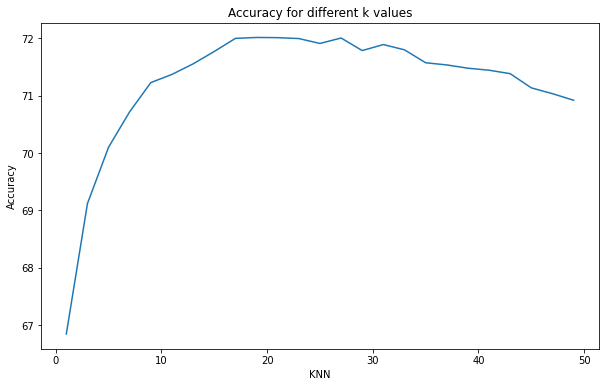

The best k value is : 19


In [0]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, neigh_near, 2), cv_scores)
plt.xlabel("KNN")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values")
plt.show()
print('The best k value is : %d' %best_k)


In [0]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
acc=knn.score(X_test,y_test)
print("Accuracy using Uni-Gram: %0.3f%%"%(acc*100))

Accuracy using Uni-Gram: 73.919%


**2.Bi-Gram(BOW)**

In [0]:
bi_gram=CountVectorizer(ngram_range=(1,2))
bi_vect=bi_gram.fit_transform(Final_data['Cleaned_review'].values)
bi_vect.shape

(49575, 3213257)

In [0]:
bi_vect_norm=preprocessing.normalize(bi_vect)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(bi_vect_norm,Final_data['sentiment'].values,test_size=0.3,shuffle=False)

In [0]:
from tqdm import tqdm
neigh_near = 50
tscv = TimeSeriesSplit(n_splits=10)
cv_scores = []
mylist = list(range(0, 51))
neighbors = list(filter(lambda x: x % 2 != 0, mylist))

for k in tqdm(neighbors):
    tmp = []
    for train, cv in tscv.split(X_train):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train[train], y_train[train])
        tmp.append(knn.score(X_train[cv], y_train[cv]) * 100)
    tmp = np.array(tmp)
    cv_scores.append(tmp.mean())

100%|██████████| 25/25 [17:26<00:00, 41.88s/it]


In [0]:
mse = [1 - x for x in cv_scores]
best_k = neighbors[mse.index(min(mse))]

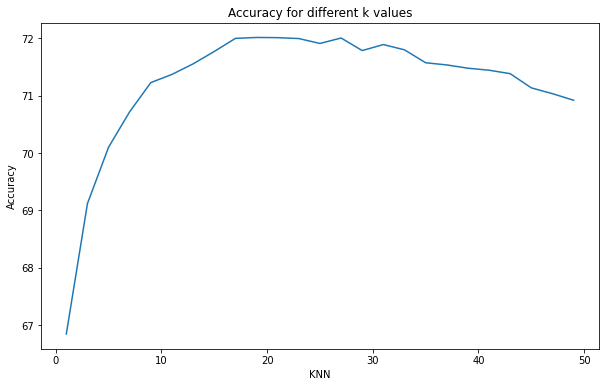

The best k value is : 19


In [0]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, neigh_near, 2), cv_scores)
plt.xlabel("KNN")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values")
plt.show()
print('The best k value is : %d' %best_k)

In [0]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
acc=knn.score(X_test,y_test)
print("Accuracy using Bi-Gram: %0.2f%%"%(acc*100))

Accuracy using Bi-Gram: 73.92%


**3.TFIDF**

In [30]:
tfidf=TfidfVectorizer(ngram_range=(1,2))
tfidf_vect=tfidf.fit_transform(Final_data['Cleaned_review'].values)
tfidf_vect.shape

(49575, 3213257)

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
tfidf_vect_norm=preprocessing.normalize(tfidf_vect)


In [0]:
X_train,X_test,y_train,y_test=train_test_split(tfidf_vect_norm,Final_data['sentiment'].values,test_size=0.3,shuffle=False)

In [0]:
from tqdm import tqdm
neigh_near = 50
tscv = TimeSeriesSplit(n_splits=10)
cv_scores = []
mylist = list(range(0, 51))
neighbors = list(filter(lambda x: x % 2 != 0, mylist))

for k in tqdm(neighbors):
    tmp = []
    for train, cv in tscv.split(X_train):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train[train], y_train[train])
        tmp.append(knn.score(X_train[cv], y_train[cv]) * 100)
    tmp = np.array(tmp)
    cv_scores.append(tmp.mean())


100%|██████████| 25/25 [20:03<00:00, 48.15s/it]


In [0]:
mse = [1 - x for x in cv_scores]
best_k = neighbors[mse.index(min(mse))]

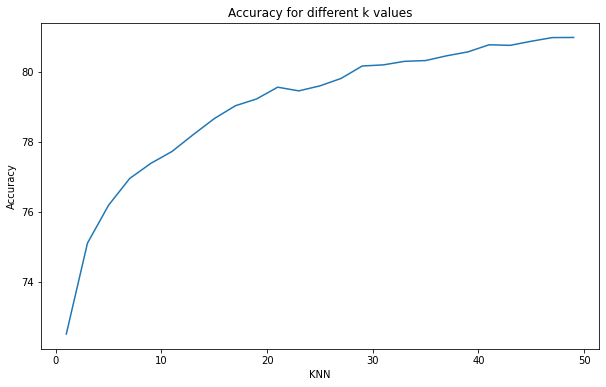

The best k value is : 49


In [0]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, neigh_near, 2), cv_scores)
plt.xlabel("KNN")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values")
plt.show()
print('The best k value is : %d' %best_k)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train,y_train)
acc=knn.score(X_test,y_test)
print("Accuracy using TFIDF: %0.2f%%"%(acc*100))

In [0]:
pred_knn=knn.predict(X_test)

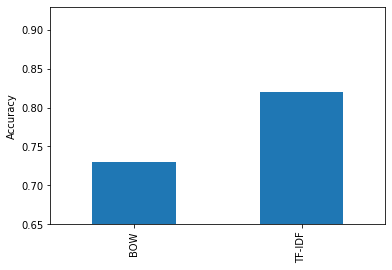

As We can see TF-IDF is giving better results 


In [0]:
Acc_knn = {
    'BOW':0.73,
    'TF-IDF':0.82
}

pd.Series(Acc_knn).plot(kind='bar')
plt.ylabel("Accuracy")
plt.ylim((.65,.93))
plt.show()
print("As We can see TF-IDF is giving better results ")

**1.Logistic Regression**


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X_train,X_test,y_train,y_test=train_test_split(tfidf_vect_norm,Final_data['sentiment'].values,test_size=0.3,shuffle=False)

In [45]:
lr=LogisticRegression(C=100)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
acc=metrics.accuracy_score(y_test,pred_lr)

Accuracy using TFIDF: 91.08%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
print("Accuracy using TFIDF: %0.2f%%"%(acc*100))

Accuracy using TFIDF: 91.08%


**2.Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train,X_test,y_train,y_test=train_test_split(tfidf_vect_norm,Final_data['sentiment'].values,test_size=0.3,shuffle=False)

In [49]:
Dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dt.fit(X_train, y_train)
pred_dt=Dt.predict(X_test)
acc=metrics.accuracy_score(y_test,pred_dt)


Accuracy using TFIDF: 72.14%


In [50]:
print("Accuracy using TFIDF: %0.2f%%"%(acc*100))

Accuracy using TFIDF: 72.14%


**3.Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(tfidf_vect_norm,Final_data['sentiment'].values,test_size=0.3,shuffle=False)
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
acc=metrics.accuracy_score(y_test,pred_rf)

In [33]:
print("Accuracy using TFIDF: %0.2f%%"%(acc*100))

Accuracy using TFIDF: 86.04%


**MULTI NB**

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
X_train,X_test,y_train,y_test=train_test_split(tfidf_vect_norm,Final_data['sentiment'].values,test_size=0.3,shuffle=False)

In [40]:
nb.fit(X_train,y_train)
pred=nb.predict(X_test)
acc=metrics.accuracy_score(y_test,pred)
print(acc)
pred_nb=nb

0.8876487594970752


(0.65, 0.93)

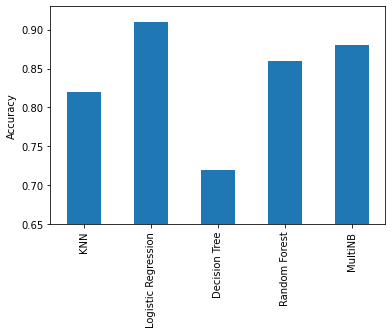

In [35]:
Acc_ = {
    'KNN':0.82,
    'Logistic Regression':0.91,
    'Decision Tree':0.72,
    'Random Forest':0.86,
    'MultiNB':0.88
}

pd.Series(Acc_).plot(kind='bar')
plt.ylabel("Accuracy")
plt.ylim((.65,.93))

**Conclusion**

At the end we can conclude that the **TF-IDF** and **Logistic Regression** 

---

Works Better for this Sentimental Analysis

---



**Refrences**

1.   StackOver Flow
2.   Geeks for Geeks
3.   Kaggle

